In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def f(z,val):
    ans=0
    deg=len(z)-1
    for i in range(0,len(z)):
        ans= ans + z[i]*(val**deg)
        deg=deg-1

    return ans


def manual_derivative(poly,z, dz, precision_digits):
  
    if (dz/10) != 0 and (f(poly,z+dz/10)-f(poly,z))/(dz/10) != 0:
        if abs(abs((f(poly,z+dz)-f(poly,z))/dz - (f(poly,z+dz/10)-f(poly,dz))/(dz/10)) / (f(poly,z+dz/10)-f(poly,z))/(dz/10)) < 0.005 * pow(10, 2-precision_digits):

            return (f(poly,z+dz/10)-f(poly,z))/(dz/10)

        else:
            manual_derivative(poly,z, dz/10, precision_digits)

    else:
        return (f(poly,z+dz)-f(poly,z))/dz

    return ((f(poly,z+dz)-f(poly,z))/dz)


In [3]:
def newt_z(poly,z_preds, precision_digits):
    return z_preds[-1] - f(poly,z_preds[-1]) / (manual_derivative(poly,z_preds[-1], 0.01, precision_digits))


def bisect_z(z_left, z_right):
    return(z_left+z_right)/2




In [26]:
def hybrid_method(poly,z_left, z_right, precision_digits, iteration_limit):
    z_preds = []
    e = []
    z_preds.append(z_right)

    newt_count = 0
    bisect_count = 0

    for i in range(0, iteration_limit):

        if abs(newt_z(poly,z_preds, precision_digits)) < abs(z_right) and abs(z_left) > abs(newt_z(poly,z_preds, precision_digits)):
            z_preds.append(newt_z(poly,z_preds, precision_digits))
            newt_count += 1

        else:

            bisect_count += 1
            z_mid = bisect_z(z_left, z_right)
            z_preds.append(z_mid)
            e.append(abs(z_preds[-2]-z_preds[-1])/(z_preds[-1]))

            if (f(poly,z_left)*f(poly,z_mid)).real > 0:
                z_left = z_mid

            elif (f(poly,z_right)*f(poly,z_mid)).real > 0:
                z_right = z_mid

            else:
                return z_preds, e, i+1, newt_count, bisect_count

        e.append(abs(z_preds[-2]-z_preds[-1])/(z_preds[-1]))
        if abs(abs(z_preds[-2]-z_preds[-1])/(z_preds[-1])) < 0.005 * pow(10, 2 - precision_digits):
            break

    return z_preds, e, i+1, newt_count, bisect_count


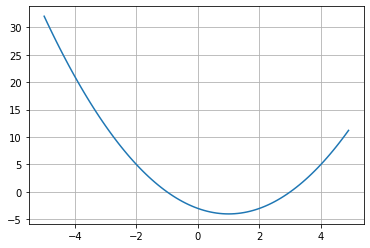

In [27]:
poly_ = [1, -2, -3]
z = np.arange(-5, 5, 0.1)
plt.plot(z,f(poly_,z))
plt.grid()
plt.show()


In [28]:
poly_=[1,-2,-3]
n=len(poly_)-1

roots=[]

for i in range(0,n):
    z_preds, errors, iterations, newt, bisect = hybrid_method(poly_, 0, 48+0j, 12, 1000)
    root=z_preds[-1]
    roots.append(root)
    poly_,rem=np.polydiv(poly_,[1,-root])






In [29]:
roots

[(3+0j), (-1+0j)]

<ipython-input-50-91fa37431990>:2: RuntimeWarning: divide by zero encountered in cdouble_scalars
  return z_preds[-1] - f(poly,z_preds[-1]) / (manual_derivative(poly,z_preds[-1], 0.01, precision_digits))
<ipython-input-50-91fa37431990>:2: RuntimeWarning: invalid value encountered in cdouble_scalars
  return z_preds[-1] - f(poly,z_preds[-1]) / (manual_derivative(poly,z_preds[-1], 0.01, precision_digits))
